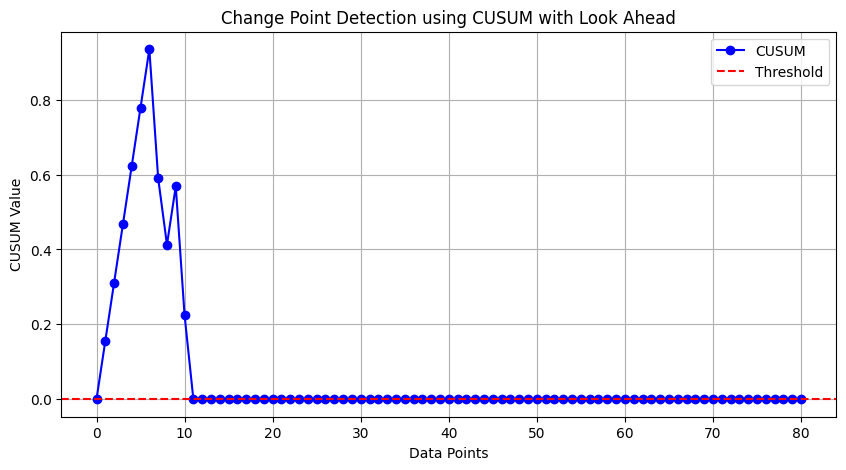

Change points detected at data points: [9, 10]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/data/NDSI-2D/U_1.csv')  # Replace 'your_dataset.csv' with your actual CSV file

# Extract the "HighLevelStateActionProbab" column as a NumPy array
data = df['HighLevelStateActionProbab'].values

# Define the threshold for change detection
threshold = 0.2  # Adjust this threshold as needed
LA = 5  # Look ahead parameter

# Initialize variables for CUSUM algorithm
cusum = np.zeros_like(data)
avg = np.mean(data)
change_points = []

for i in range(1, len(data)):
    cusum[i] = max(0, cusum[i - 1] + data[i] - avg - threshold)

    if cusum[i] > 0 and i + LA < len(data) and all(data[i + 1:i + LA + 1] <= avg + threshold):
        change_points.append(i)

# Plot the CUSUM values
plt.figure(figsize=(10, 5))
plt.plot(cusum, marker='o', linestyle='-', color='b', label='CUSUM')
plt.axhline(0, color='r', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('CUSUM Value')
plt.legend()
plt.title('Change Point Detection using CUSUM with Look Ahead')
plt.grid(True)
plt.show()

# Print the detected change points
if len(change_points) > 0:
    print(f"Change points detected at data points: {change_points}")
else:
    print("No change points detected.")
